# Sample Python code to plot GEOS-Chem data

First we load some Python packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

np.seterr(invalid='ignore'); # disable a warning from matplotlib + cartopy

## GEOS-Chem netCDF diagnostics


Show contents of the OutputDir folder of the GEOS-Chem run directory geosfp_4x5_standard.  This is where netCDF output from GEOS_Chem will be sent.

In [2]:
ls ~/tutorial/geosfp_4x5_standard/OutputDir/

GEOSChem.Restart.20160701_0020z.nc4  GEOSChem.SpeciesConc.20160701_0020z.nc4


Open a GEOS-Chem output file in netCDF format into an xarray Dataset.  This is a data object format that is geared to storing data from netCDF files.  Print the contents of the Dataset.

In [3]:
ds = xr.open_dataset("~/tutorial/geosfp_4x5_standard/OutputDir/GEOSChem.SpeciesConc.20160701_0020z.nc4")

ds

<xarray.Dataset>
Dimensions:         (ilev: 73, lat: 46, lev: 72, lon: 72, time: 1)
Coordinates:
  * time            (time) datetime64[ns] 2016-07-01T00:20:00
  * lev             (lev) float64 0.9925 0.9775 0.9625 ... 2.635e-05 1.5e-05
  * ilev            (ilev) float64 1.0 0.985 0.97 0.955 ... 3.27e-05 2e-05 1e-05
  * lat             (lat) float64 -89.0 -86.0 -82.0 -78.0 ... 82.0 86.0 89.0
  * lon             (lon) float64 -180.0 -175.0 -170.0 ... 165.0 170.0 175.0
Data variables:
    hyam            (lev) float64 ...
    hybm            (lev) float64 ...
    hyai            (ilev) float64 ...
    hybi            (ilev) float64 ...
    P0              float64 ...
    AREA            (lat, lon) float32 ...
    SpeciesConc_O3  (time, lev, lat, lon) float32 ...
    SpeciesConc_CO  (time, lev, lat, lon) float32 ...
    SpeciesConc_NO  (time, lev, lat, lon) float32 ...
Attributes:
    title:                           GEOS-Chem diagnostic collection: Species...
    history:                 

Make a quick plot of the Ozone species in the Dataset.  You can play with the plot options.

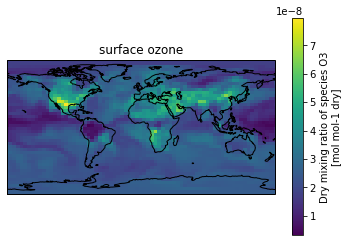

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ds['SpeciesConc_O3'][0,0].plot(ax=ax)
plt.title('surface ozone');

## GEOS-FP met field

We can also use the xarray package to load data from one of the met field files that are used to drive GEOS-Chem.

In [5]:
ds_met = xr.open_dataset("~/ExtData/GEOS_4x5/GEOS_FP/2016/07/GEOSFP.20160701.I3.4x5.nc")
ds_met

<xarray.Dataset>
Dimensions:  (lat: 46, lev: 72, lon: 72, time: 8)
Coordinates:
  * time     (time) datetime64[ns] 2016-07-01 ... 2016-07-01T21:00:00
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Data variables:
    PS       (time, lat, lon) float32 ...
    PV       (time, lev, lat, lon) float32 ...
    QV       (time, lev, lat, lon) float32 ...
    T        (time, lev, lat, lon) float32 ...
Attributes:
    Title:                 GEOS-FP instantaneous 3-hour parameters (I3), proc...
    Contact:               GEOS-Chem Support Team (geos-chem-support@as.harva...
    References:            www.geos-chem.org; wiki.geos-chem.org
    Filename:              GEOSFP.20160701.I3.4x5.nc
    History:               File generated on: 2016/08/04 09:56:57 GMT-0300
    ProductionDateTime:    File generated on: 